In [1]:
import requests
import json

from api_keys import api_key
# jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000

url = "https://developer.nps.gov/api/v1/parks"

param = {
    "api_key":api_key,
    "limit":500
    }

response = requests.get(url, params = param)
json_response = response.json()
print(json.dumps(json_response, indent=4))


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [2]:
import pandas as pd
import pprint 

# print(len(json_response['data']))cbgn
# print(json_response['data'][])

nps_api_df = pd.DataFrame(columns=['parkCode','fullName','latitude','longitude','state','address','cost'])

i=0

for park in json_response['data']:
    
#     print(park['parkCode'])   
#     print(park['states'])
    try:
        park_address = f"{park['addresses'][0]['line1']}{park['addresses'][0]['city']}-{park['addresses'][0]['postalCode']}"
    except:
        park_address = ""
        
    try:
        entrance_fee_cost = park['entranceFees'][0]['cost']
    except:
        entrance_fee_cost = 0
        
    try:
        state = park['addresses'][0]['stateCode']
        
    except:
        try:
            state = park['states'].split(',')[0]    
        except:
            state=""
        
#     print(f"state:{state}")
#     print('---------')
#     print(park_address)
    nps_api_df = nps_api_df.append({
        'parkCode':park['parkCode'].upper(),
        'fullName':park['fullName'],
        'latitude':park['latitude'],
        'longitude':park['longitude'],
        'state':state,
        'address':park_address,
        'cost':entrance_fee_cost
    },ignore_index=True)

In [3]:
nps_api_df

,parkCode,fullName,latitude,longitude,state,address,cost
0,ABLI,Abraham Lincoln Birthplace National Historical...,37.5858662,-85.67330523,KY,2995 Lincoln Farm RoadHodgenville-42748,0.00
1,ACAD,Acadia National Park,44.409286,-68.247501,ME,25 Visitor Center RoadBar Harbor-04609,30.00
2,ADAM,Adams National Historical Park,42.2553961,-71.01160356,MA,1250 Hancock StreetQuincy-02169,15.00
3,AFAM,African American Civil War Memorial,38.9166,-77.026,DC,1925 Vermont Avenue NorthwestWashington-20001,0.00
4,AFBG,African Burial Ground National Monument,40.71452681,-74.00447358,NY,African Burial Ground National MonumentNew Yor...,0.00
...,...,...,...,...,...,...,...
463,YORK,Yorktown Battlefield Part of Colonial National...,37.2195,-76.4983,VA,Yorktown BattlefieldYorktown-23690,0.00
464,YOSE,Yosemite National Park,37.84883288,-119.5571873,CA,,35.00
465,YUHO,Yucca House National Monument,37.24778944,-108.6861274,CO,Off County Rd 20.5Cortez-81321,0.00
466,YUCH,Yukon - Charley Rivers National Preserve,65.0935608,-142.7960021,AK,101 Dunkel StFairbanks-99701,0.00


In [4]:
# file_path = "../WeatherPy/output_data/cities.csv"

# cities_df = pd.read_csv(file_path)
# cities_df
import pandas as pd
file_path="Data_Resources/park_type_and_region.csv"

parktype_df = pd.read_csv(file_path)
parktype_df

file_path="Data_Resources/StateNameList.csv"

state_df = pd.read_csv(file_path)
state_df


,state,state_name
0,AL,Alabama
1,AK,Alaska
2,AZ,Arizona
3,AR,Arkansas
4,CA,California
5,CO,Colorado
6,CT,Connecticut
7,DE,Delaware
8,DC,District of Columbia
9,FL,Florida


In [5]:
park_df = pd.merge(nps_api_df, parktype_df, on="parkCode", how='left')
park_df

data_df = pd.merge(park_df,state_df, on='state', how='left')
data_df

,parkCode,fullName,latitude,longitude,state,address,cost,parkType,Region,state_name
0,ABLI,Abraham Lincoln Birthplace National Historical...,37.5858662,-85.67330523,KY,2995 Lincoln Farm RoadHodgenville-42748,0.00,National Historical Park,Southeast,Kentucky
1,ACAD,Acadia National Park,44.409286,-68.247501,ME,25 Visitor Center RoadBar Harbor-04609,30.00,National Park,Northeast,Maine
2,ADAM,Adams National Historical Park,42.2553961,-71.01160356,MA,1250 Hancock StreetQuincy-02169,15.00,National Historical Park,Northeast,Massachusetts
3,AFAM,African American Civil War Memorial,38.9166,-77.026,DC,1925 Vermont Avenue NorthwestWashington-20001,0.00,NaN,NaN,District of Columbia
4,AFBG,African Burial Ground National Monument,40.71452681,-74.00447358,NY,African Burial Ground National MonumentNew Yor...,0.00,National Monument,Northeast,New York
...,...,...,...,...,...,...,...,...,...,...
463,YORK,Yorktown Battlefield Part of Colonial National...,37.2195,-76.4983,VA,Yorktown BattlefieldYorktown-23690,0.00,NaN,NaN,Virginia
464,YOSE,Yosemite National Park,37.84883288,-119.5571873,CA,,35.00,National Park,Pacific West,California
465,YUHO,Yucca House National Monument,37.24778944,-108.6861274,CO,Off County Rd 20.5Cortez-81321,0.00,NaN,NaN,Colorado
466,YUCH,Yukon - Charley Rivers National Preserve,65.0935608,-142.7960021,AK,101 Dunkel StFairbanks-99701,0.00,National Preserve,Alaska,Alaska


In [ ]:


# x_axis = np.arange(len(new_df))
# tick_locations = [value+0.4 for value in x_axis]

# plt.figure(figsize=(20,3))
# plt.bar(x_axis, new_df["parkType"], color='r', alpha=0.5, align="edge")
# # plt.xticks(tick_locations, new_df["state"], rotation="vertical")

# plt.xlim(-0.25, len(x_axis))
# plt.ylim(0, count(new_df["parkType"]).count())

# plt.title("Average Rain per State")
# plt.xlabel("State")
# plt.ylabel("Average Amount of Rainfall in Inches")

# # Save our graph and show the grap
# plt.tight_layout()
# # plt.savefig("./Images/avg_state_rain.png")
# plt.show()

# plt.bar(new_df["state"], new_df["parkType"], color='b', alpha=1, align="center")

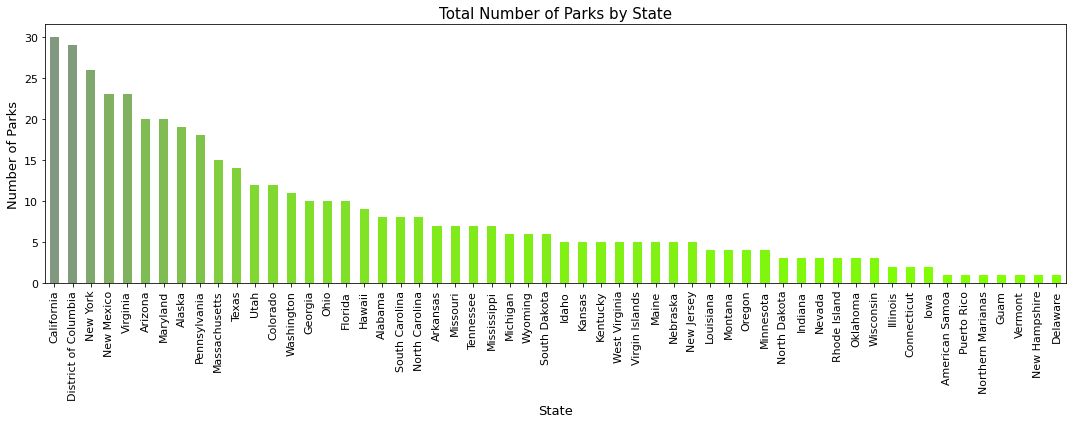

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle, islice
import matplotlib as mp

park_by_state_df = data_df["state_name"].value_counts()

fig = plt.figure(figsize=(15,6))

# ax1 = plt.axes()
# ax1.set_facecolor("ivory")

likeability_scores = np.array(park_by_state_df)
data_normalizer = mp.colors.Normalize()
color_map = mp.colors.LinearSegmentedColormap(
    "my_map",
    {
        "red": [(0, 1.0, 0.5),(1.0, 0.5, 0.5)],
        "green": [(0, 1, 1),(1.0, 0.6, 1)],
        "blue": [(0, 0, 0),(1.0, 0.5, 0.5)]
    }
)

# x_axis = np.arange(len(park_by_state_df))
# tick_locations = [value+0.4 for value in x_axis]
# plt.xticks(tick_locations, park_by_state_df, rotation="vertical")

park_by_state_df.plot(kind="bar", rot=90, fontsize=11, color=color_map(data_normalizer(likeability_scores)))


plt.xlabel('State',fontsize=13)
plt.ylabel('Number of Parks',fontsize=13)
plt.title('Total Number of Parks by State', fontsize=15)

plt.tight_layout()
plt.show()

fig.savefig('Park_by_State.png')

In [7]:
file_path="Data_Resources/Annual Visitation By Park (1979 - Last Calendar Year).xlsx"

annual_visitation_df = pd.read_excel(file_path)
annual_visitation_df

,parkCode,Park Name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Average
0,ABLI,Abraham Lincoln Birthplace NHP,177122.0,163568.0,169515.0,163928.0,241264.0,148605.0,252495.0,269580,260964,238226,208526.7
1,ACAD,Acadia NP,2504208.0,2374645.0,2431052.0,2254922.0,2563129.0,2811184.0,3303393.0,3509271,3537575,3437286,2872666.5
2,ADAM,Adams NHP,73339.0,219975.0,336031.0,285501.0,178468.0,183632.0,199301.0,255562,121007,187400,204021.6
3,AFBG,African Burial Ground NM,117113.0,108585.0,77624.0,93234.0,54861.0,56348.0,46526.0,43182,45035,47427,68993.5
4,AGFO,Agate Fossil Beds NM,12509.0,11617.0,11824.0,10504.0,12440.0,13264.0,15555.0,32038,16238,16657,15264.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,WUPA,Wupatki NM,221083.0,216165.0,201365.0,190878.0,195962.0,212828.0,223172.0,236454,205122,187059,209008.8
375,YELL,Yellowstone NP,3640185.0,3394326.0,3447729.0,3188030.0,3513484.0,4097710.0,4257177.0,4116524,4115000,4020288,3779045.3
376,YOSE,Yosemite NP,3901408.0,3951393.0,3853404.0,3691191.0,3882642.0,4150217.0,5028868.0,4336890,4009436,4422861,4122831.0
377,YUCH,Yukon-Charley Rivers NPRES,6211.0,1718.0,1393.0,3914.0,2329.0,1133.0,1146.0,952,1272,1114,2118.2


In [8]:
park_region_df = data_df.copy()

park_region_df["parkType"].fillna("Unknown", inplace = True)
park_region_df["Region"].fillna("Unknown", inplace = True)

park_region_df
# data_df.isna().sum()
# parkCode        0
# fullName        0
# latitude        0
# longitude       0
# state           0
# address         0
# cost            0
# parkType      102
# Region        102
# state_name      0

,parkCode,fullName,latitude,longitude,state,address,cost,parkType,Region,state_name
0,ABLI,Abraham Lincoln Birthplace National Historical...,37.5858662,-85.67330523,KY,2995 Lincoln Farm RoadHodgenville-42748,0.00,National Historical Park,Southeast,Kentucky
1,ACAD,Acadia National Park,44.409286,-68.247501,ME,25 Visitor Center RoadBar Harbor-04609,30.00,National Park,Northeast,Maine
2,ADAM,Adams National Historical Park,42.2553961,-71.01160356,MA,1250 Hancock StreetQuincy-02169,15.00,National Historical Park,Northeast,Massachusetts
3,AFAM,African American Civil War Memorial,38.9166,-77.026,DC,1925 Vermont Avenue NorthwestWashington-20001,0.00,Unknown,Unknown,District of Columbia
4,AFBG,African Burial Ground National Monument,40.71452681,-74.00447358,NY,African Burial Ground National MonumentNew Yor...,0.00,National Monument,Northeast,New York
...,...,...,...,...,...,...,...,...,...,...
463,YORK,Yorktown Battlefield Part of Colonial National...,37.2195,-76.4983,VA,Yorktown BattlefieldYorktown-23690,0.00,Unknown,Unknown,Virginia
464,YOSE,Yosemite National Park,37.84883288,-119.5571873,CA,,35.00,National Park,Pacific West,California
465,YUHO,Yucca House National Monument,37.24778944,-108.6861274,CO,Off County Rd 20.5Cortez-81321,0.00,Unknown,Unknown,Colorado
466,YUCH,Yukon - Charley Rivers National Preserve,65.0935608,-142.7960021,AK,101 Dunkel StFairbanks-99701,0.00,National Preserve,Alaska,Alaska


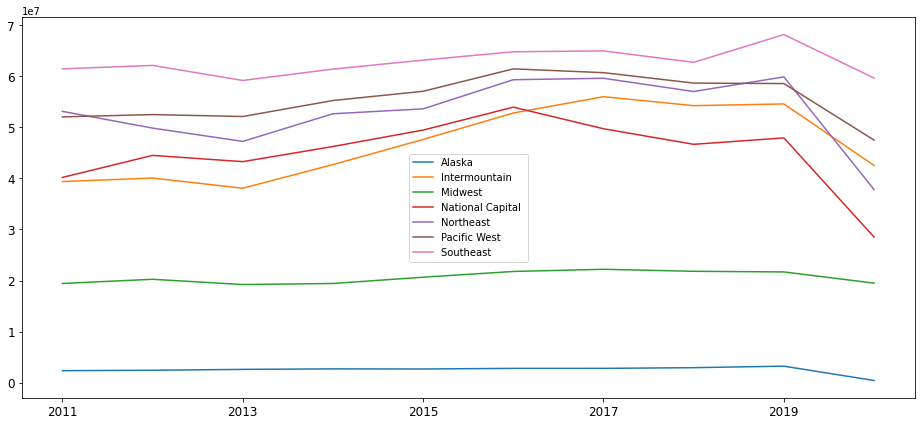

In [9]:
# Multi line chart by region visitation

selected_park_region_df = park_region_df[['parkCode','parkType','Region']]
selected_park_region_df

region_df = pd.merge(annual_visitation_df,selected_park_region_df,on="parkCode", how='left')
region_df

del region_df['Average']

list_2020 = ['406682','42561951','19486819','28524786','37832098','47518887', '59685052']

region_groupby_df = region_df.groupby('Region').sum()
region_2020_df = region_groupby_df

# .reset_index()

region_2020_df['2020']=list_2020

region_2020_df[2017] = region_2020_df[2017].astype(float)
region_2020_df[2018] = region_2020_df[2018].astype(float)
region_2020_df[2019] = region_2020_df[2019].astype(float)
region_2020_df['2020'] = region_2020_df['2020'].astype(float)

region_chart_df = region_2020_df
#region_chart_df

region_chart_df.transpose().iloc[1:].rename(columns={
    0: "Alaska",
    1: "Intermountain",
    2: "Midwest",
    3: "National Capital",
    4: "Northeast",
    5: "Pacific West",
    6: "Southeast"
}).plot(kind="line",figsize=(16,7),fontsize=12)

# plt.ylim(0,70000000)

plt.legend(loc='best')

In [10]:
# years_group_df = region_df.groupby('').sum()
# region_df.plot(kind='line')

# region_groupby_df.index.values
# y1 = region_groupby_df
# plt.plot(years, y1, label = "line 1")

# plt.show()
# world_avg, = plt.plot(years, region_groupby_df, color="blue", label="Years" )

# plot lines 
# plt.plot(x, y, label = "line 1") 
# plt.plot(y, x, label = "line 2") 
# plt.plot(x, np.sin(x), label = "curve 1") 
# plt.plot(x, np.cos(x), label = "curve 2") 
# plt.legend() 
# plt.show()


# world_avg, = plt.plot(years, region_df.groupby('Region').sum(), color="blue", label="Years" )


# # Plot the unemployment values for a single country
# # country_one, = plt.plot(years, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014"]], 
# #                         color="green",label=combined_unemployed_data.loc['USA',"Country Name"])
# # Create a legend for our chart
# plt.legend(handles=[world_avg], loc="best")
# # Show the chart
# plt.show()
# region_df.plot(label="World Average")
# # combined_unemployed_data.loc['USA', "2010":"2014"].plot(label="United States")
# plt.legend()
# plt.show()

# df=pd.DataFrame({'x': years, 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21) })
 
# # multiple line plot
# plt.plot( 'x', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
# plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
# plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
# plt.legend()


In [11]:
# Code Starts HERE
# Top 10 Visits by Park (2010-2019 averaged * Pre-COVID19)
annual_visitation_df.sort_values(by=['Average'], ascending=False).head(10)


# Top 10
# 1. Golden Gate NRA (14,840,800)
# 2. Blue Ridge PKWY (14,791,419)
# 3. Great Smoky Mountains NP (10,494,546)
# 4. Gateway NRA (7,665,918)
# 5. George Washington MEM PKWY (7,654,910)
# 6. Lincoln Memorial (7,131,717)
# 7. Lake Mead NRA (7,048,517)
# 8. Natchez Trace PKWY (5,975,784)
# 9. Grand Canyon NP (5,252,922)
# 10. Vietnam Veterans MEM (4,681,521)

,parkCode,Park Name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Average
149,GOGA,Golden Gate NRA,14271503.0,14567487.0,14540338.0,14289121.0,15004420.0,14888537.0,15638777.0,14981897,15223697,15002227,14840800.4
32,BLRI,Blue Ridge PKWY,14517118.0,15382447.0,15205059.0,12877368.0,13941749.0,15054603.0,15175578.0,16093765,14690418,14976085,14791419.0
158,GRSM,Great Smoky Mountains NP,9463538.0,9008830.0,9685829.0,9354695.0,10099276.0,10712674.0,11312786.0,11338893,11421200,12547743,10494546.4
137,GATE,Gateway NRA,8820757.0,7697727.0,5043863.0,6191246.0,6021713.0,6392565.0,8651770.0,9190610,9243305,9405622,7665917.8
143,GWMP,George Washington MEM PKWY,6925099.0,7417397.0,7425577.0,7360392.0,7472150.0,7286463.0,10323339.0,7562793,7288623,7487265,7654909.8
216,LINC,Lincoln Memorial,6042315.0,5971220.0,6191361.0,6546518.0,7139072.0,7941771.0,7915934.0,7956117,7804683,7808182,7131717.3
207,LAKE,Lake Mead NRA,7080758.0,6396682.0,6285439.0,6344714.0,6942873.0,7298465.0,7175891.0,7882339,7578958,7499049,7048516.8
248,NATR,Natchez Trace PKWY,5910950.0,5765343.0,5560668.0,6012740.0,5846474.0,5785812.0,5891315.0,6326062,6362439,6296041,5975784.4
152,GRCA,Grand Canyon NP,4388386.0,4298178.0,4421352.0,4564840.0,4756771.0,5520736.0,5969811.0,6254238,6380495,5974411,5252921.8
353,VIVE,Vietnam Veterans MEM,4555371.0,4020127.0,4424407.0,4142721.0,4403467.0,5597077.0,5299713.0,5072589,4719148,4580587,4681520.7


In [12]:
# Bottom 10 Visits by Park (2010-2020 averaged * Pre-COVID19)
annual_visitation_df.sort_values(by=['Average'], ascending=True).head(10)

# Bottom 10
# 1. Aniakchak NM & PRES (96)
# 2. Rio Grande W&SR (533)
# 3. Port Chicago Naval Magazine NMEM (892)
# 4. Thaddeus Kosciuszko NMEM (2,039)
# 5. Carter G. Woodson Home NHS (2,073)*
# 6. Yukon-Charley Rivers NPRES (2,118)
# 7. Bering Land Bridge NPRES (2,566)
# 8. Nicodemus NHS (3,230)
# 9. Eugene O'Neill NHS (3,249)
# 10. Sand Creek Massacre NHS (5,555)
# *only three years of data - new park

,parkCode,Park Name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Average
10,ANIA,Aniakchak NM & PRES,62.0,57.0,19.0,134.0,134.0,153.0,100.0,100,100,100,95.9
295,RIGR,Rio Grande W&SR,1103.0,873.0,694.0,703.0,321.0,120.0,463.0,399,330,324,533.0
286,POCH,Port Chicago Naval Magazine NMEM,984.0,545.0,533.0,596.0,786.0,963.0,1942.0,1086,653,830,891.8
333,THKO,Thaddeus Kosciuszko NMEM,2888.0,1949.0,2045.0,1682.0,1475.0,1261.0,2794.0,2293,2077,1921,2038.5
54,CAWO,Carter G. Woodson Home NHS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,1954,2381,2073.0
377,YUCH,Yukon-Charley Rivers NPRES,6211.0,1718.0,1393.0,3914.0,2329.0,1133.0,1146.0,952,1272,1114,2118.2
23,BELA,Bering Land Bridge NPRES,2642.0,1890.0,2642.0,2642.0,2636.0,2642.0,2642.0,2642,2642,2642,2566.2
258,NICO,Nicodemus NHS,3448.0,2681.0,3505.0,3241.0,3374.0,3306.0,3552.0,2916,2738,3540,3230.1
100,EUON,Eugene O'Neill NHS,2445.0,2593.0,2789.0,2929.0,3202.0,3942.0,4287.0,3931,3432,2944,3249.4
316,SAND,Sand Creek Massacre NHS,4063.0,3935.0,4384.0,4795.0,7402.0,5887.0,6847.0,6535,6006,5701,5555.5


In [13]:
# Code Starts HERE
# Overnight Stays Pie Chart: Read in 2019 Fiscal Report


file_path="Data_Resources/2019Fiscal_Year_Visitation_Report.csv"

overnight_stays_df = pd.read_csv(file_path)
overnight_stays_df




,Park2019,parkCode,RecreationalVisits2019,NonRecreationalVisits2019,TotalVisits2019,RecreationVisitorHours2019,NonRecreationVisitorHours2019,VisitorDays2019,ConcessionerLodging2019,ConcessionerCamping2019,...,TotalRecreationVisitorHours2019,TotalNonRecreationVisitorHours2019,TotalVisitorDays2019,TotalConcessionerLodging2019,TotalConcessionerCamping2019,TotalTentOvernights2019,TotalRecreationVehicleOvernights2019,TotalBackcountryOvernights2019,TotalMiscellaneousOvernights2019,TotalNonRecreationOvernights2019
0,Abraham Lincoln Birthplace NHP,ABLI,"230,666",0,"230,666","230,666",0,"19,222",0,0,...,"1,413,762,728","92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131"
1,Acadia NP,ACAD,"3,484,042","47,100","3,531,142","23,043,108","47,100","1,920,258",0,965,...,"1,413,762,728","92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131"
2,Adams NHP,ADAM,"185,002",210,"185,212","184,651",105,"15,387",0,0,...,"1,413,762,728","92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131"
3,African Burial Ground NM,AFBG,"43,398",0,"43,398","30,202",0,"2,516",0,0,...,"1,413,762,728","92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131"
4,Agate Fossil Beds NM,AGFO,"16,836",0,"16,836","38,135",0,"3,177",0,0,...,"1,413,762,728","92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,Wupatki NM,WUPA,"182,999","6,531","189,530","366,302","3,920","30,525",0,0,...,"1,413,762,728","92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131"
375,Yellowstone NP,YELL,"4,062,120","1,203,593","5,265,713","79,958,386","709,645","6,663,198","611,110","476,909",...,"1,413,762,728","92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131"
376,Yosemite NP,YOSE,"4,481,945","169,839","4,651,784","65,362,817","4,350,096","5,446,901","673,290",0,...,"1,413,762,728","92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131"
377,Yukon-Charley Rivers NPRES,YUCH,"1,157",0,"1,157","49,210",0,"4,100",0,0,...,"1,413,762,728","92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131"


In [14]:
#overnight_stays_df= overnight_stays_df.drop(['ID','prediction'],axis=1)

labels = overnight_stays_df.columns.values.tolist()[-7:]
sizes = overnight_stays_df.loc[0].values.tolist()[-7:]
sizes = [int(i.replace(',','')) for i in sizes]
print(labels)
print(sizes)



['TotalConcessionerLodging2019', 'TotalConcessionerCamping2019', 'TotalTentOvernights2019', 'TotalRecreationVehicleOvernights2019', 'TotalBackcountryOvernights2019', 'TotalMiscellaneousOvernights2019', 'TotalNonRecreationOvernights2019']
[3181747, 1219465, 3470298, 2422533, 1924536, 1370640, 30131]


In [15]:
renamed_stays_df = overnight_stays_df.rename(columns={'TotalConcessionerLodging2019': 'Lodging', 'TotalConcessionerCamping2019': 'Camping',
                                   'TotalTentOvernights2019': 'Tent', 'TotalRecreationVehicleOvernights2019': 'RV', 
                                   'TotalBackcountryOvernights2019': 'Backcountry',
                                   'TotalMiscellaneousOvernights2019': 'Misc.',
                                   'TotalNonRecreationOvernights2019': 'Non-Recreation'})

renamed_stays_df.head()

,Park2019,parkCode,RecreationalVisits2019,NonRecreationalVisits2019,TotalVisits2019,RecreationVisitorHours2019,NonRecreationVisitorHours2019,VisitorDays2019,ConcessionerLodging2019,ConcessionerCamping2019,...,TotalRecreationVisitorHours2019,TotalNonRecreationVisitorHours2019,TotalVisitorDays2019,Lodging,Camping,Tent,RV,Backcountry,Misc.,Non-Recreation
0,Abraham Lincoln Birthplace NHP,ABLI,"230,666",0,"230,666","230,666",0,"19,222",0,0,...,"1,413,762,728","92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131"
1,Acadia NP,ACAD,"3,484,042","47,100","3,531,142","23,043,108","47,100","1,920,258",0,965,...,"1,413,762,728","92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131"
2,Adams NHP,ADAM,"185,002",210,"185,212","184,651",105,"15,387",0,0,...,"1,413,762,728","92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131"
3,African Burial Ground NM,AFBG,"43,398",0,"43,398","30,202",0,"2,516",0,0,...,"1,413,762,728","92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131"
4,Agate Fossil Beds NM,AGFO,"16,836",0,"16,836","38,135",0,"3,177",0,0,...,"1,413,762,728","92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131"


In [53]:
renamed_stays_df.columns

Index(['Park2019', 'parkCode', 'RecreationalVisits2019',
       'NonRecreationalVisits2019', 'TotalVisits2019',
       'RecreationVisitorHours2019', 'NonRecreationVisitorHours2019',
       'VisitorDays2019', 'ConcessionerLodging2019', 'ConcessionerCamping2019',
       'TentOvernights2019', 'RecreationVehicleOvernights2019',
       'BackcountryOvernights2019', 'MiscellaneousOvernights2019',
       'NonRecreationOvernights2019', 'TotalRecreationVisits2019',
       'TotalNonRecreationVisits2019', 'SumOfTotalVisits2019',
       'TotalRecreationVisitorHours2019', 'TotalNonRecreationVisitorHours2019',
       'TotalVisitorDays2019', 'Lodging', 'Camping', 'Tent', 'RV',
       'Backcountry', 'Misc.', 'Non-Recreation'],
      dtype='object')

<IPython.core.display.Javascript object>


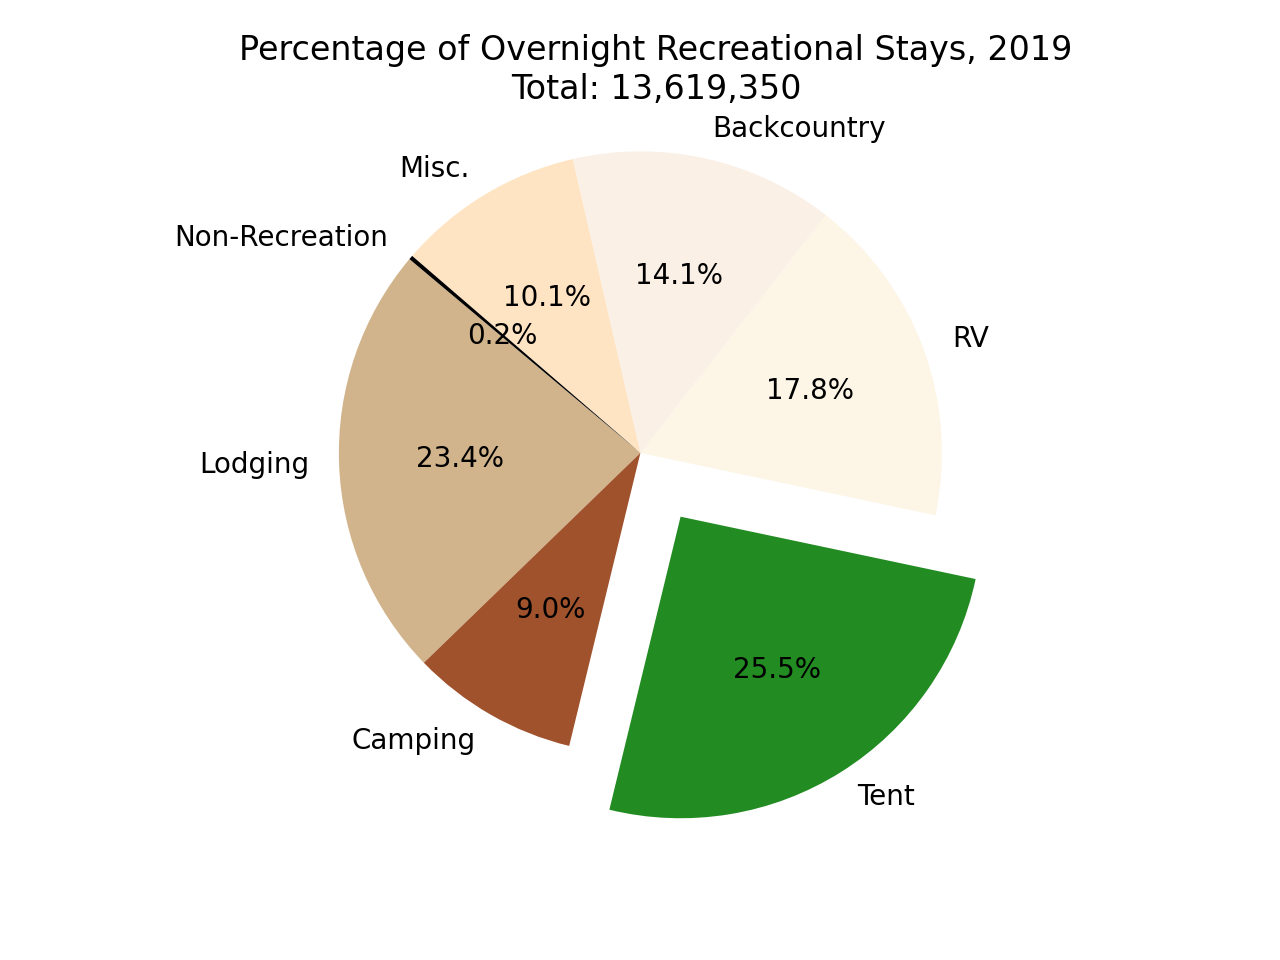

(-0.4456822526416237,
 0.4870443763371684,
 -0.5325895312282032,
 0.44797186186975846)

In [63]:
%matplotlib notebook

# Import our dependencies
import matplotlib.pyplot as plt
import numpy as np

labels = renamed_stays_df.columns.values.tolist()[-7:]
sizes = renamed_stays_df.loc[0].values.tolist()[-7:]
sizes = [int(i.replace(',','')) for i in sizes]

# The colors of each section of the pie chart
colors = ["tan", "sienna", "forestgreen", "oldlace","linen", "bisque", "black"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0, 0.10, 0, 0, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", radius=1*.4, shadow=False, startangle=140)
plt.title("Percentage of Overnight Recreational Stays, 2019\nTotal: 13,619,350")

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")


In [41]:
park_region_df.head()

,parkCode,fullName,latitude,longitude,state,address,cost,parkType,Region,state_name
0,ABLI,Abraham Lincoln Birthplace National Historical...,37.5858662,-85.67330523,KY,2995 Lincoln Farm RoadHodgenville-42748,0.00,National Historical Park,Southeast,Kentucky
1,ACAD,Acadia National Park,44.409286,-68.247501,ME,25 Visitor Center RoadBar Harbor-04609,30.00,National Park,Northeast,Maine
2,ADAM,Adams National Historical Park,42.2553961,-71.01160356,MA,1250 Hancock StreetQuincy-02169,15.00,National Historical Park,Northeast,Massachusetts
3,AFAM,African American Civil War Memorial,38.9166,-77.026,DC,1925 Vermont Avenue NorthwestWashington-20001,0.00,Unknown,Unknown,District of Columbia
4,AFBG,African Burial Ground National Monument,40.71452681,-74.00447358,NY,African Burial Ground National MonumentNew Yor...,0.00,National Monument,Northeast,New York


In [42]:
park_region_df["parkType"].value_counts()

Unknown                         102
National Historic Site           74
National Monument                70
National Park                    61
National Historical Park         52
National Memorial                26
National Recreation Area         15
National Seashore                10
National Battlefield             10
National Preserve                 9
National Military Park            9
Park (Other)                      8
National Wild & Scenic River      6
National Battlefield Park         4
National River                    4
National Lakeshore                3
National Parkway                  3
International Historic Site       1
National Reserve                  1
Name: parkType, dtype: int64

In [43]:
park_region_df["parkType"].replace({'Park (Other)':'Park Other/Unknown',
                                   'Unknown': 'Park Other/Unknown'}, inplace=True)
park_region_df["parkType"].value_counts()


Park Other/Unknown              110
National Historic Site           74
National Monument                70
National Park                    61
National Historical Park         52
National Memorial                26
National Recreation Area         15
National Seashore                10
National Battlefield             10
National Preserve                 9
National Military Park            9
National Wild & Scenic River      6
National Battlefield Park         4
National River                    4
National Parkway                  3
National Lakeshore                3
International Historic Site       1
National Reserve                  1
Name: parkType, dtype: int64

In [44]:
park_region_df.head()

,parkCode,fullName,latitude,longitude,state,address,cost,parkType,Region,state_name
0,ABLI,Abraham Lincoln Birthplace National Historical...,37.5858662,-85.67330523,KY,2995 Lincoln Farm RoadHodgenville-42748,0.00,National Historical Park,Southeast,Kentucky
1,ACAD,Acadia National Park,44.409286,-68.247501,ME,25 Visitor Center RoadBar Harbor-04609,30.00,National Park,Northeast,Maine
2,ADAM,Adams National Historical Park,42.2553961,-71.01160356,MA,1250 Hancock StreetQuincy-02169,15.00,National Historical Park,Northeast,Massachusetts
3,AFAM,African American Civil War Memorial,38.9166,-77.026,DC,1925 Vermont Avenue NorthwestWashington-20001,0.00,Park Other/Unknown,Unknown,District of Columbia
4,AFBG,African Burial Ground National Monument,40.71452681,-74.00447358,NY,African Burial Ground National MonumentNew Yor...,0.00,National Monument,Northeast,New York


In [45]:
renamed_stays_df.head()

,Park2019,parkCode,RecreationalVisits2019,NonRecreationalVisits2019,TotalVisits2019,RecreationVisitorHours2019,NonRecreationVisitorHours2019,VisitorDays2019,ConcessionerLodging2019,ConcessionerCamping2019,...,TotalRecreationVisitorHours2019,TotalNonRecreationVisitorHours2019,TotalVisitorDays2019,Lodging,Camping,Tent,RV,Backcountry,Misc.,Non-Recreation
0,Abraham Lincoln Birthplace NHP,ABLI,"230,666",0,"230,666","230,666",0,"19,222",0,0,...,"1,413,762,728","92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131"
1,Acadia NP,ACAD,"3,484,042","47,100","3,531,142","23,043,108","47,100","1,920,258",0,965,...,"1,413,762,728","92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131"
2,Adams NHP,ADAM,"185,002",210,"185,212","184,651",105,"15,387",0,0,...,"1,413,762,728","92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131"
3,African Burial Ground NM,AFBG,"43,398",0,"43,398","30,202",0,"2,516",0,0,...,"1,413,762,728","92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131"
4,Agate Fossil Beds NM,AGFO,"16,836",0,"16,836","38,135",0,"3,177",0,0,...,"1,413,762,728","92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131"


In [46]:
parkvisits_df = pd.merge(park_region_df, renamed_stays_df, on="parkCode", how='right')
parkvisits_df

,parkCode,fullName,latitude,longitude,state,address,cost,parkType,Region,state_name,...,TotalRecreationVisitorHours2019,TotalNonRecreationVisitorHours2019,TotalVisitorDays2019,Lodging,Camping,Tent,RV,Backcountry,Misc.,Non-Recreation
0,ABLI,Abraham Lincoln Birthplace National Historical...,37.5858662,-85.67330523,KY,2995 Lincoln Farm RoadHodgenville-42748,0.00,National Historical Park,Southeast,Kentucky,...,"1,413,762,728","92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131"
1,ACAD,Acadia National Park,44.409286,-68.247501,ME,25 Visitor Center RoadBar Harbor-04609,30.00,National Park,Northeast,Maine,...,"1,413,762,728","92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131"
2,ADAM,Adams National Historical Park,42.2553961,-71.01160356,MA,1250 Hancock StreetQuincy-02169,15.00,National Historical Park,Northeast,Massachusetts,...,"1,413,762,728","92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131"
3,AFBG,African Burial Ground National Monument,40.71452681,-74.00447358,NY,African Burial Ground National MonumentNew Yor...,0.00,National Monument,Northeast,New York,...,"1,413,762,728","92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131"
4,AGFO,Agate Fossil Beds National Monument,42.42170419,-103.753886,NE,301 River RoadHarrison-69346,0.00,National Monument,Midwest,Nebraska,...,"1,413,762,728","92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,WUPA,Wupatki National Monument,35.55741077,-111.3957216,AZ,25137 N. Sunset Crater-Wupatki Loop Rd.Flagsta...,25.00,National Monument,Intermountain,Arizona,...,"1,413,762,728","92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131"
375,YELL,Yellowstone National Park,44.59824417,-110.5471695,WY,2 Officers RowYellowstone National Park-82190,35.00,National Park,Intermountain,Wyoming,...,"1,413,762,728","92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131"
376,YOSE,Yosemite National Park,37.84883288,-119.5571873,CA,,35.00,National Park,Pacific West,California,...,"1,413,762,728","92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131"
377,YUCH,Yukon - Charley Rivers National Preserve,65.0935608,-142.7960021,AK,101 Dunkel StFairbanks-99701,0.00,National Preserve,Alaska,Alaska,...,"1,413,762,728","92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131"


In [47]:
# horizontal bar chart parkType by TotalVisits2019
import math
data = []
for x in parkvisits_df['TotalVisits2019'].values.tolist():
    if type(x) is str:
        data.append(int(x.replace(',','')))
#     elif type(x) is float:
#             if math.isnan(x):
#                 data.append(0)
#             else:
#                 data.append(x)
    else:
        data.append(0)

parkvisits_df['TotalVisits2019_clean'] = data
parkvisits_df


,parkCode,fullName,latitude,longitude,state,address,cost,parkType,Region,state_name,...,TotalNonRecreationVisitorHours2019,TotalVisitorDays2019,Lodging,Camping,Tent,RV,Backcountry,Misc.,Non-Recreation,TotalVisits2019_clean
0,ABLI,Abraham Lincoln Birthplace National Historical...,37.5858662,-85.67330523,KY,2995 Lincoln Farm RoadHodgenville-42748,0.00,National Historical Park,Southeast,Kentucky,...,"92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131",230666
1,ACAD,Acadia National Park,44.409286,-68.247501,ME,25 Visitor Center RoadBar Harbor-04609,30.00,National Park,Northeast,Maine,...,"92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131",3531142
2,ADAM,Adams National Historical Park,42.2553961,-71.01160356,MA,1250 Hancock StreetQuincy-02169,15.00,National Historical Park,Northeast,Massachusetts,...,"92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131",185212
3,AFBG,African Burial Ground National Monument,40.71452681,-74.00447358,NY,African Burial Ground National MonumentNew Yor...,0.00,National Monument,Northeast,New York,...,"92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131",43398
4,AGFO,Agate Fossil Beds National Monument,42.42170419,-103.753886,NE,301 River RoadHarrison-69346,0.00,National Monument,Midwest,Nebraska,...,"92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131",16836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,WUPA,Wupatki National Monument,35.55741077,-111.3957216,AZ,25137 N. Sunset Crater-Wupatki Loop Rd.Flagsta...,25.00,National Monument,Intermountain,Arizona,...,"92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131",189530
375,YELL,Yellowstone National Park,44.59824417,-110.5471695,WY,2 Officers RowYellowstone National Park-82190,35.00,National Park,Intermountain,Wyoming,...,"92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131",5265713
376,YOSE,Yosemite National Park,37.84883288,-119.5571873,CA,,35.00,National Park,Pacific West,California,...,"92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131",4651784
377,YUCH,Yukon - Charley Rivers National Preserve,65.0935608,-142.7960021,AK,101 Dunkel StFairbanks-99701,0.00,National Preserve,Alaska,Alaska,...,"92,171,939","117,813,560","3,181,747","1,219,465","3,470,298","2,422,533","1,924,536","1,370,640","30,131",1157


<IPython.core.display.Javascript object>


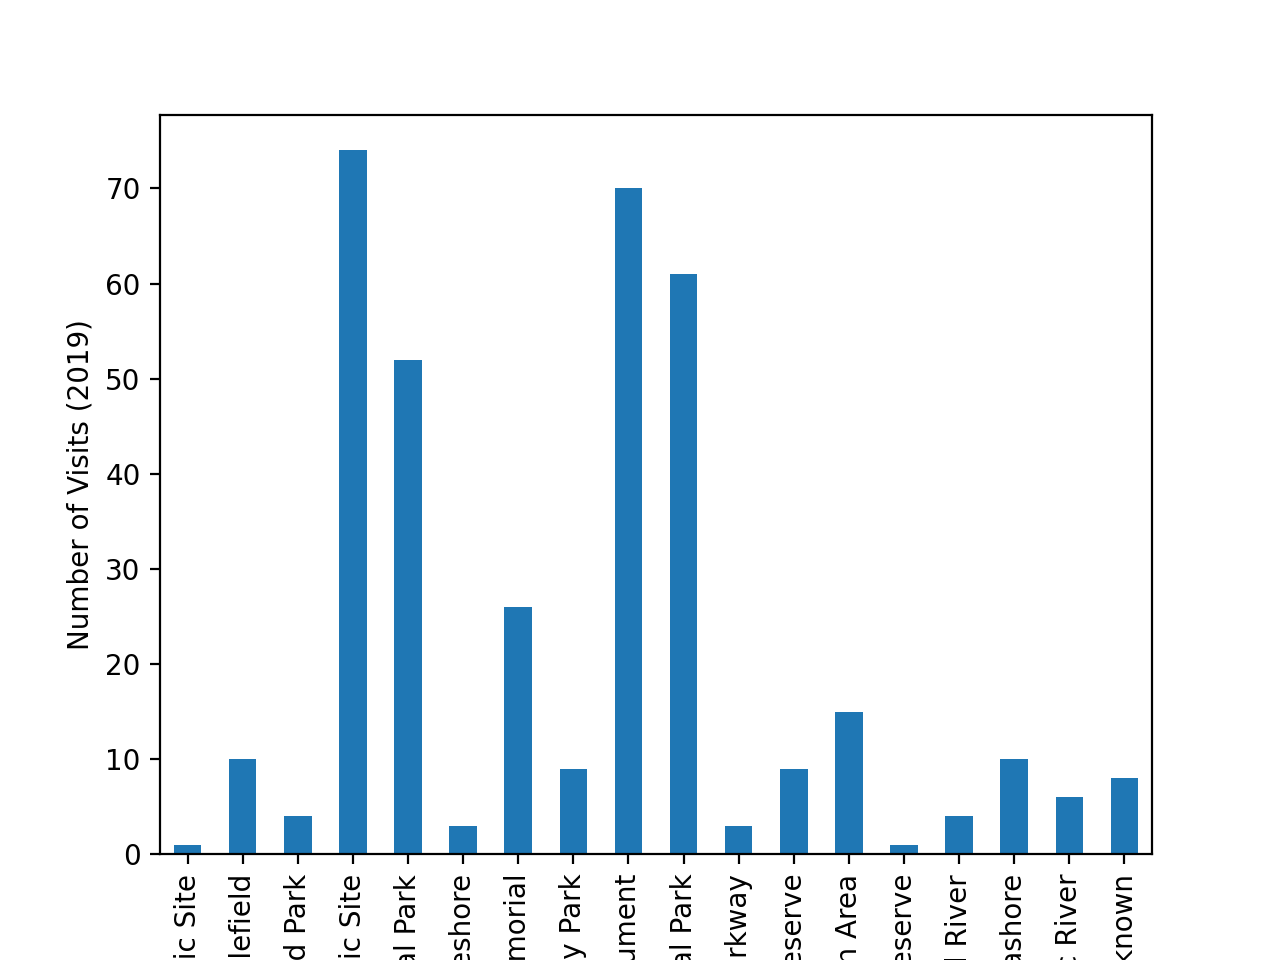

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

plt.ioff()

typepark = parkvisits_df.groupby('parkType')
count_type = typepark['parkType'].count()
count_chart = count_type.plot(kind='bar')

count_chart.set_xlabel("Park Type")
count_chart.set_ylabel("Number of Visits (2019)")
plt.show()


# x_axis = parkvisits_df['parkType']
# tick_locations = [value for value in x_axis]

# plt.figure(figsize=(20,3))
# plt.bar(x_axis, chart_df['parkType'], color='r', alpha=0.5, align='center')
# plt.xticks(tick_locations, chart_df['TotalVisits2019_clean'], roation='horizontal')

# plt.show()



# from matplotlib.ticker import StrMethodFormatter

# chart_df.plot.barh(x='parkType', y='TotalVisits2019_clean', title='Visits by Park Type', color='green')
# plt.tight_layout()
# plt.show()

# .sort_values().plot.bar()
# ax = x.plot(kind='barh', figsize=(8,10), color='chocolate', zorder=2, width=0.85)
# vals = ax.get_xticks()
# for ticks in vals:
#     ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='eeeeee', zorder=1)
# ax.set_xlabel("Number of Visits", labelpad=20, weight='bold', size=12)

# ax.set_ylabel("Park Type", labelpad=20, weight='bold', size=12)
# ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

plt.ioff()

typepark = parkvisits_df.groupby('parkType')
count_type = typepark['parkType'].count()
count_chart = count_type.plot(kind='bar')

count_chart.set_xlabel("Park Type")
count_chart.set_ylabel("Number of Visits (2019)")
plt.show()